# Project: Wrangling and Analyze Data

Author: Mlungiseleli Notshokovu | Data Analyst

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Importing all packages needed
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


It looks like there is some inconsistency in the data: most columns have 2356 non-null values, but there are some columns with way less than that. It may help to investigate further if necessary.

The twitter archive data has a total of 15 columns and 2 356 row values for most columns.

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Trying to download the data programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
#writing the data into a file image-predictions.tsv
with open('image-predictions.tsv', mode='wb') as output:
  output.write(response.content)

In [3]:
#creating an images dataframe from the image-predictions.tsv file
images_df = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The images data has a total of 12 columns and 2 075 entry values for all columns.

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
#----------------------------------------------------
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

The data extraction was a success with a total run time of about 1911 seconds (~ 31 min)

The above data extraction ran successfully. Below, I will try to read the first line in the 'tweet_json.txt' file and see if I can get the columns.

In [4]:
temp_list = []
# Check the contents of the tweet_json.txt by reading the first tweet
with open('tweet_json.txt', 'r') as json_file:
    first_line = json_file.readline()
    first_tweet = json.loads(first_line)

# list all the keys
first_tweet.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

From the above keys, we can see all the columns required for further investigation. Below I will use these columns to create a dictionary and then store them in a list. I will then proceed to create/convert a dataframe from the JSON file.

In [5]:
dict_json = [] #Empty list to store the dictionary data

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        
        dict_json.append({
            'tweet_id': json_data['id_str'],
            'favorites': json_data['favorite_count'],
            'retweet_count': json_data['retweet_count'],
            'user_id': json_data['user']['id_str'],
            'followers_count': json_data['user']['followers_count'],
            'friends_count': json_data['user']['friends_count'],
            'favourites_count': json_data['user']['favourites_count'],
            'statuses_count': json_data['user']['statuses_count'],
            'join_date': json_data['user']['created_at']
        })

In [6]:
#Creating a dataframe from the above tweets dictionary
twitter_json_df = pd.DataFrame(dict_json, columns = [
    'tweet_id', 'favorites','retweet_count','user_id', 'followers_count',
    'friends_count', 'favourites_count', 'statuses_count', 'join_date'
])


In [7]:
twitter_json_df

,tweet_id,favorites,retweet_count,user_id,followers_count,friends_count,favourites_count,statuses_count,join_date
0,892420643555336193,33747,6983,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
1,892177421306343426,29282,5286,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
2,891815181378084864,22015,3469,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
3,891689557279858688,36867,7210,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
4,891327558926688256,35242,7735,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
5,891087950875897856,17778,2593,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
6,890971913173991426,10349,1652,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
7,890729181411237888,56741,15715,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
8,890609185150312448,24472,3611,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
9,890240255349198849,27897,6087,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015


In [11]:
twitter_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 9 columns):
tweet_id            2327 non-null object
favorites           2327 non-null int64
retweet_count       2327 non-null int64
user_id             2327 non-null object
followers_count     2327 non-null int64
friends_count       2327 non-null int64
favourites_count    2327 non-null int64
statuses_count      2327 non-null int64
join_date           2327 non-null object
dtypes: int64(6), object(3)
memory usage: 163.7+ KB


The additional data extracted from Twitter has a total of 9 columns and 2327 entries. Further assessment is required to ensure data quality and correctness before conducting analysis or visualization.

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
images_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
twitter_json_df

,tweet_id,favorites,retweet_count,user_id,followers_count,friends_count,favourites_count,statuses_count,join_date
0,892420643555336193,33747,6983,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
1,892177421306343426,29282,5286,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
2,891815181378084864,22015,3469,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
3,891689557279858688,36867,7210,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
4,891327558926688256,35242,7735,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
5,891087950875897856,17778,2593,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
6,890971913173991426,10349,1652,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
7,890729181411237888,56741,15715,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
8,890609185150312448,24472,3611,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015
9,890240255349198849,27897,6087,4196983835,9324096,21,147170,15970,Sun Nov 15 21:41:29 +0000 2015


In [17]:
twitter_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 9 columns):
tweet_id            2327 non-null object
favorites           2327 non-null int64
retweet_count       2327 non-null int64
user_id             2327 non-null object
followers_count     2327 non-null int64
friends_count       2327 non-null int64
favourites_count    2327 non-null int64
statuses_count      2327 non-null int64
join_date           2327 non-null object
dtypes: int64(6), object(3)
memory usage: 163.7+ KB


Just by assessing the data visually, one can point out a some inconsistencies and quality issues. For example:
    - Some columns are empty: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, 
      in_reply_to_status_id. These may need to be removed.
    - Source links still have HTML tags. If useful, the links will have to be extracted properly from the tags.
    - timestamp datatype is not correct. Datetime is the correct datatype
    - Some dog names do not make sense, and some are just letters

### Quality issues

1. timestamp datatype is not correct. Datetime is the correct datatype
2. Will need to remove all retweeted data and leave only the original tweets
3. Source links still have HTML tags. If useful, we can simply extract the source kind, i.e Iphone/Android
4. id format should be string, not numeric

5. Some dog names do not make sense, and some are just letters: 'a', 'the'

6. Remove rows with no breed predictions.

7. There are tweets with no images. These should be removed, as the rating is derived from the image

8. For those tweets with multiple breed predictions, take the one with the highest confidence level

9. Remove columns that are not useful and those that are empty, i.e retweeted_status_id, retweeted_status_user_id

### Tidiness issues
1. The columns: doggo, floofer, pupper, puppo can be under a single column describing the dog stage. **dog_stage**

2. Combine rating columns to one column. convert to float and calculate rating_numerator/rating_denominator as 'rating'

3. Merge all 3 dataframes into 1 master dataframe for better analysis and visualization

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [7]:
# Make copies of original pieces of data
twitter_json_clean = twitter_json_df.copy()
archive_clean = archive_df.copy()
images_clean = images_df.copy()

### Issue #1:

#### Define:

- timestamp datatype is not correct. Datetime is the correct datatype

#### Code

In [8]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [9]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2:

#### Define:
Need to remove all retweeted data and leave only the original tweets.

- Check where retweeted_status_id is not null
- Leave only tweets with retweeted_status_id is null

#### Code

In [10]:
archive_clean['retweeted_status_id'].isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [11]:
archive_clean['retweeted_status_id'].isnull().sum()

2175

In [12]:
archive_clean['retweeted_status_id'].notnull().sum()

181

In [13]:
#Removing all tweets with a retweeted_status_id not empty by recreating the df with null retweeted_status_id
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

#### Test

In [14]:
archive_clean['retweeted_status_id'].isnull().sum()

2175

In [15]:
archive_clean['retweeted_status_id'].notnull().sum()

0

### Issue #3:

#### Define:
Source links still have HTML tags. We can simply extract the source kind, i.e Iphone/TweetDeck
- Extract the HTML tags by using regex

#### Code

In [16]:
archive_clean[archive_clean['source'].str.contains('iphone') == False]['source'].iloc[0]

'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'

In [17]:
archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
archive_clean['source'] = archive_clean['source'].str.extract(r'rel="nofollow">(.*)<')

#### Test

In [19]:
archive_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4:

#### Define:
id format should be string, not numeric
- convert integer datatype to string

#### Code

In [20]:
#Convert tweet_id datatype to string
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')

In [21]:
twitter_json_clean['tweet_id'] = twitter_json_clean['tweet_id'].astype('str')

In [22]:
images_clean['tweet_id'] = images_clean['tweet_id'].astype('str')

#### Test

In [23]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

In [25]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 9 columns):
tweet_id            2327 non-null object
favorites           2327 non-null int64
retweet_count       2327 non-null int64
user_id             2327 non-null object
followers_count     2327 non-null int64
friends_count       2327 non-null int64
favourites_count    2327 non-null int64
statuses_count      2327 non-null int64
join_date           2327 non-null object
dtypes: int64(6), object(3)
memory usage: 163.7+ KB


In [26]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #5:

#### Define:
Some dog names do not make sense, and some are just letters: 'a', 'the'
- We can either remove all entries with incorrect names or
- Try to find the correct name within the 'text' column

#### Code

In [24]:
archive_clean[archive_clean['name'].str.contains('^[a-z]') == True]['name'].value_counts()

a               55
the              8
an               6
very             4
one              4
quite            3
just             3
getting          2
not              2
actually         2
space            1
light            1
all              1
life             1
such             1
by               1
old              1
mad              1
incredibly       1
his              1
my               1
this             1
officially       1
unacceptable     1
infuriating      1
Name: name, dtype: int64

In [25]:
#A list of all the incorrect names
remove_list = list(archive_clean[archive_clean['name'].str.contains('^[a-z]') == True]['name'].unique())
print(remove_list)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [26]:
#Using the list with all the incorrect names and replacing them with NaN
archive_clean['name'].replace(remove_list, np.nan, inplace=True)

#### Test

In [27]:
archive_clean[archive_clean['name'].str.contains('^[a-z]') == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6:

#### Define:
Remove rows with no breed predictions. For those with multiple breed predictions, take the one with the highest confidence level

#### Code

In [27]:
images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [28]:
#dog breed predictions with a False prediction for p1, p2, p3
images_clean[~((images_clean['p1_dog'] == False) & (images_clean['p2_dog'] == False) & (images_clean['p3_dog'] == False))].shape

(1751, 12)

In [29]:
images_clean = images_clean[~((images_clean['p1_dog'] == False) & (images_clean['p2_dog'] == False) & (images_clean['p3_dog'] == False))]

#### Test

In [30]:
images_clean[((images_clean['p1_dog'] == False) & (images_clean['p2_dog'] == False) & (images_clean['p3_dog'] == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #7:

#### Define:
There are tweets with no images. These should be removed, as the rating is derived from the image

#### Code

In [84]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

In [31]:
#removing all NaN url entries 
archive_clean = archive_clean[archive_clean['expanded_urls'].notna()]

#### Test

In [32]:
archive_clean[archive_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8:

#### Define:
The columns: doggo, floofer, pupper, puppo can be under a single column describing the dog type. dog_type
- Replace all None values with empty strings
- Merge the 4 columns to one column named **dog_stage**

#### Code

In [211]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2013 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns](1), fl

In [223]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
archive_clean[(archive_clean['doggo'] == 'None') & (archive_clean['floofer'] == 'None') & (archive_clean['pupper'] == 'None') & (archive_clean['puppo'] == 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [34]:
#Replacing all None values with an empty entry before merging the columns to one
archive_clean['doggo'].replace(['None'], '', inplace=True)
archive_clean['floofer'].replace(['None'], '', inplace=True)
archive_clean['pupper'].replace(['None'], '', inplace=True)
archive_clean['puppo'].replace(['None'], '', inplace=True)

In [35]:
#Concatenate the 4 columns to one column 'dot_stage'
archive_clean['dog_stage'] = archive_clean['doggo'] + '' + archive_clean['floofer'] + '' + archive_clean['pupper'] + '' + archive_clean['puppo']

In [36]:
archive_clean['dog_stage'].value_counts()

                1779
pupper           222
doggo             72
puppo             23
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

After combining all the 4 columns, there are 1779 empty entries. This may suggest that the dog stage was not captured or it may still be found in the text.

A possible fix would be to search the 'text' column for 'pupper', 'doggo', 'floofer', and 'puppo'. Once any of these entries is found, append it to the dog_stage column.

In [37]:
#Get the total number of empty entries
archive_clean[archive_clean['dog_stage'] == '']['dog_stage'].value_counts()[0]

1779

In [38]:
def search_add(search_list, col, df):
    for stage in search_list:
        
        #Size of the list of IDs with no dog stage
        stage_len = len(df[((df[col].str.contains(stage) == True) & (df['dog_stage'] == ''))]['tweet_id'])
        
        if stage_len > 0:
            #A list of all the indexes/position with no dog stage
            index_list = list(df[((df[col].str.contains(stage) == True) & (df['dog_stage'] == ''))]['tweet_id'].index)
            for index in index_list:
                #Add the specific dog stage to the specified position
                df['dog_stage'].loc[index] = stage

In [39]:
search_list = ['doggo', 'floofer', 'pupper', 'puppo']
col = 'text'
search_add(search_list, col, archive_clean)

In [40]:
#Removing the 4 columns
archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

In [41]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [42]:
archive_clean.dog_stage.value_counts()

                1742
pupper           246
doggo             80
puppo             28
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

From the above count, there are entries with more that one dog stage. We can manually fix this by taking the last entry.

In [43]:
archive_clean['dog_stage'].replace(['doggopupper'], 'pupper', inplace=True)
archive_clean['dog_stage'].replace(['doggofloofer'], 'floofer', inplace=True)
archive_clean['dog_stage'].replace(['doggopuppo'], 'puppo', inplace=True)

#### Test

In [44]:
archive_clean.dog_stage.value_counts()

           1742
pupper      256
doggo        80
puppo        29
floofer      10
Name: dog_stage, dtype: int64

### Issue #9:

#### Define:
Remove columns that are not useful and those that are empty, i.e retweeted_status_id, retweeted_status_user_id

#### Code

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2013 non-null object
dog_stage                     2117 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 328.1+ KB


In [45]:
arc_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_clean.drop(columns = arc_cols, inplace = True)

In [46]:
twitter_json_clean.drop(columns = ['join_date'], inplace = True)

#### Test

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2013 non-null object
dog_stage             2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 245.4+ KB


In [48]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
tweet_id            2327 non-null object
favorites           2327 non-null int64
retweet_count       2327 non-null int64
user_id             2327 non-null object
followers_count     2327 non-null int64
friends_count       2327 non-null int64
favourites_count    2327 non-null int64
statuses_count      2327 non-null int64
dtypes: int64(6), object(2)
memory usage: 145.5+ KB


### Issue #10:

#### Define:
Image prediction data has multiple breed prediction per image. So there needs to be only one dog_breed prediction.
- Determine the true dog breed by taking the prediction with the highest confidence level (~1)
- Remove all uncessary columns and create a dog_breed column

#### Code

In [48]:
images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


In [49]:
#create a 'dog_breed' column and assign a dog breed entry with high confidence level
images_clean['dog_breed'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.2 
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.2
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.2
                     else np.nan for index, df in images_clean.iterrows()]


In [50]:
#Remove 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
images_clean.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)

### Test

In [51]:
images_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Issue #11:

### Define:

combine rating columns to one column. 
- convert to float and calculate rating_numerator/rating_denominator as 'rating'

### Code

In [52]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2013 non-null object
dog_stage             2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 245.4+ KB


In [52]:
#First change the datatype from int to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype('float')

In [53]:
#Create a new column called 'rating' from rating_numerator/rating_denominator
archive_clean['rating'] = archive_clean['rating_numerator']/archive_clean['rating_denominator']

In [54]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,1.2


In [55]:
#drop the old rating columns
archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace=True)

### Test

In [56]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,1.2


### Issue #12:

### Define:
Combine all 3 datasets to one for analysis and visualization
- use inner join to ensure only entries with all the information 

### Code

In [57]:
#Merge archive_clean and images_clean
archive_master = archive_clean.merge(images_clean, how='inner', on = ['tweet_id'])

In [54]:
archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,jpg_url,img_num,dog_breed
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,,1.3,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever


In [58]:
#Merge archive_clean and images_clean
archive_master = archive_master.merge(twitter_json_clean, how='inner', on = ['tweet_id'])

### Test

In [60]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 18 columns):
tweet_id            1678 non-null object
timestamp           1678 non-null datetime64[ns]
source              1678 non-null object
text                1678 non-null object
expanded_urls       1678 non-null object
name                1598 non-null object
dog_stage           1678 non-null object
rating              1678 non-null float64
jpg_url             1678 non-null object
img_num             1678 non-null int64
dog_breed           1408 non-null object
favorites           1678 non-null int64
retweet_count       1678 non-null int64
user_id             1678 non-null object
followers_count     1678 non-null int64
friends_count       1678 non-null int64
favourites_count    1678 non-null int64
statuses_count      1678 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(9)
memory usage: 249.1+ KB


In [61]:
archive_master.shape

(1678, 18)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [66]:
# Export clean dataframe to csv file
archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. What is the top used source to publish tweets?

2. What is the most popular dog breed?

3. What is the most popular dog name?

4. Top 10 highest ratings?

5. Top 10 favourite dog breeds?

In [59]:
archive_master = pd.read_csv('twitter_archive_master.csv')

## 1. What is the top used source to publish tweets?

In [60]:
archive_master['source'].value_counts().sort_values( ascending=False)

Twitter for iPhone    1648
Twitter Web Client      22
TweetDeck                8
Name: source, dtype: int64

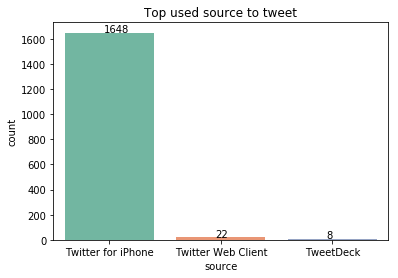

In [63]:
#Visualize the distribution
ax = sns.countplot(x = 'source', data = archive_master,
                   palette="Set2")

#annotate count value on each source
for p, label in zip(ax.patches, archive_master.source.value_counts().values):
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+2.1))
    
ax.set_title("Top used source to tweet");

'Twitter for Iphone' is the top used source to publish tweets with over 1 648 tweets.

## 2. What is the most popular dog breed?

In [64]:
archive_master['dog_breed'].value_counts().sort_values( ascending=False).head()

golden_retriever      140
Labrador_retriever     91
Pembroke               89
Chihuahua              75
pug                    53
Name: dog_breed, dtype: int64

Text(0,0.5,'Dog Breed')

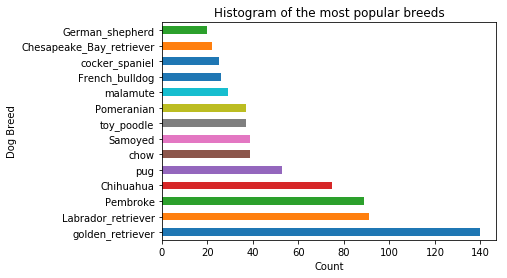

In [65]:
df_breed = archive_master.groupby('dog_breed').filter(lambda x: len(x) >= 20)

df_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the most popular breeds')
plt.xlabel('Count')
plt.ylabel('Dog Breed')

The most dog breed appears to be a Golden Retriever, followed by a Labrador Retriever.

## 3. What is the most popular dog name?

In [66]:
archive_master['name'].value_counts().sort_values( ascending=False).head()

None       418
Cooper      10
Oliver       9
Tucker       9
Charlie      9
Name: name, dtype: int64

In [67]:
#removing names with None entries
name_df = archive_master[archive_master['name'] != 'None']

In [68]:
name_df['name'].value_counts().sort_values( ascending=False).head()

Cooper     10
Charlie     9
Tucker      9
Oliver      9
Lucy        9
Name: name, dtype: int64

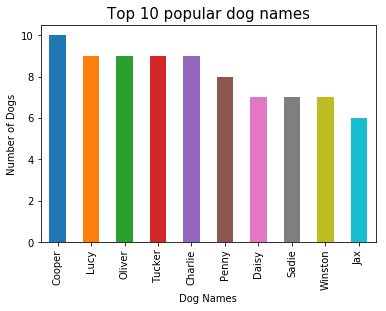

In [69]:
name_df['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 popular dog names', size=15)
plt.xlabel('Dog Names')
plt.plot();

From the above bar plot, 'Copper' appears to be the most popular dog name followed by 'Oliver', 'Charlie', 'Lucy', and 'Tucker'.

## 4. Top 10 highest ratings?

In [70]:
archive_master['rating'].sort_values( ascending=False).head(10)

450     7.500000
344     3.428571
494     2.700000
1196    2.600000
138     1.400000
509     1.400000
91      1.400000
131     1.400000
243     1.400000
246     1.400000
Name: rating, dtype: float64

In [71]:
archive_master.sort_values('rating', ascending=False)['rating'].head(10)

450     7.500000
344     3.428571
494     2.700000
1196    2.600000
33      1.400000
358     1.400000
509     1.400000
182     1.400000
263     1.400000
58      1.400000
Name: rating, dtype: float64

The highest rating is 7.5 

## 5. Top 10 favourite dog breeds?


In [72]:
#Grouping the data by 'dog_breed' and 'favourites' counts, and taking the highest 10
archive_master.groupby('dog_breed')['favorites'].count().sort_values(ascending=False).head(10)

dog_breed
golden_retriever      140
Labrador_retriever     91
Pembroke               89
Chihuahua              75
pug                    53
chow                   39
Samoyed                39
toy_poodle             37
Pomeranian             37
malamute               29
Name: favorites, dtype: int64

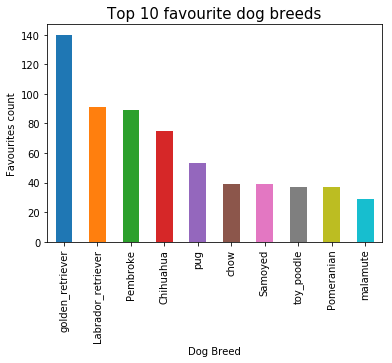

In [73]:
# Code to plot a bar graph of the top 10 faviurite dog breeds
archive_master.groupby('dog_breed')['favorites'].count().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.ylabel('Favourites count')
plt.title('Top 10 favourite dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.plot();

The top favourite dog breed appears to be a Golden Retriever, followed by a Labrador Retriever.